In [1]:
# for image compression testing
import glob, os
import time
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# for getting screenshots
import numpy as np
from PIL import Image, ImageGrab

# for getting keyboard input
from pynput import keyboard, mouse
from pynput.keyboard import Key, Controller
from pynput.mouse import Controller

# makes the program DPI aware so that it can actually capture the screen correctly
# coordinates would be messed up otherwise
from ctypes import windll
user32 = windll.user32
user32.SetProcessDPIAware()

1

In [ ]:
'''
Image Compression Testing
'''

# get images
os.chdir(os.getcwd() + "/test_screenshots")
scale = 0.05
images = list()
startTime = time.time()
for file in glob.glob("*.png"):
    im = Image.open(file).convert("L")
    width, height = im.size
    im = im.resize((round(scale * width), round(scale * height)) , Image.BICUBIC)
    np_im = np.array(im) / 255
    images.append(np_im)
endTime = time.time()

totalTime = endTime - startTime
avgTime = totalTime / len(images)
arr = np.asarray(images)
os.chdir("..")

# display new images
plt.imshow(arr[264], cmap = "gray")
plt.show()

# get time results
print("Total Time: " + str(totalTime) + " seconds")
print("Average Time: " + str(avgTime) + " seconds")

In [49]:
# bound coordinates for the screenshots
x1, y1, x2, y2 = 0, 0, 0, 0
arr = list()
inputs = list()

In [50]:
# for getting keyboard/mouse input to set the bound coordinates
kb = Controller()
mouse = Controller()

In [51]:
def getTrainingData():
    training = True
    keyPresses = list()

    def on_press(key):
        if key == Key.esc:
            keyboard.Listener.stop(listener2)
            print("Lister 2 stopped!")
        if key == Key.space:
            keyPresses.pop()
            keyPresses.append(1)
    
    # Collect events until released
    listener2 = keyboard.Listener(on_press = on_press, on_release = None)
    listener2.start()
    print("Listener 2 started!")
    screenShotsTaken = 0
    images = list()
    scale = 0.05
    elapsedTime = 0    
    startTime = time.time()

    while training:                        
        im = ImageGrab.grab((x1, y1, x2, y2)) # get screenshot
        im = im.convert("L") # convert to grayscale
        width, height = im.size
        im = im.resize((round(scale * width), round(scale * height)) , Image.BICUBIC) # scale down the image
        np_im = np.array(im) / 255 # scale down the pixel values

        images.append(np_im)
        keyPresses.append(0)
        screenShotsTaken = screenShotsTaken + 1
        elapsedTime = time.time() - startTime   
        space = False
        training = listener2.running
        
    print("Total time: " + str(elapsedTime))
    print("Screenshots Taken: " + str(screenShotsTaken))
    print("Average time per screenshot: " + str(elapsedTime / screenShotsTaken))
    
    result = list()
    result.append(images)
    result.append(keyPresses)
    return result

In [52]:
def on_press(key):
    global x1, y1, x2, y2
    if key == Key.shift_l:
        if x1 == 0:
            x1, y1 = mouse.position
        else:
            x2, y2 = mouse.position
    if key == Key.print_screen:
        # display screenshot to confirm bound coordinates
        im = ImageGrab.grab((x1, y1, x2, y2))
        plt.imshow(np.asarray(im))
        plt.title("Is this screencap right?")
        plt.show()

In [53]:
def on_release(key):
    if key == Key.ctrl_l:
        # Stop listener
        keyboard.Listener.stop(listener)
        print("Listener stopped!")
        # start training 
        print("Getting training data!")
        global arr, inputs
        arr, inputs = getTrainingData()
    if key == Key.esc:
        # stop training
        training = False
        # Stop listener
        keyboard.Listener.stop(listener)
        print("Listener stopped!")

Listener started!


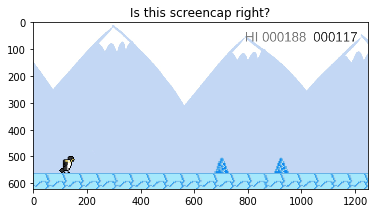

Listener stopped!
Getting training data!
Listener 2 started!
Lister 2 stopped!
Total time: 89.02551984786987
Screenshots Taken: 1710
Average time per screenshot: 0.052061707513374196


In [54]:
# Collect events until released
listener = keyboard.Listener(on_press = on_press, on_release = on_release)
listener.start()
print("Listener started!")

In [ ]:
# clear the screenshots folder
os.chdir(os.getcwd() + "/screenshots")
for f in glob.glob("*"):
    os.remove(f)
os.chdir("..")

In [55]:
np_arr = np.asarray(arr)

In [75]:
fig = plt.figure()
i = 0
frame = plt.imshow(np_arr[0], cmap = "gray", animated = True)
def update(*args):
    global i
    if (i < len(np_arr) - 1):
        i = i + 1
    else:
        i = 0
    frame.set_array(np_arr[i])
    return frame

# create and save animation
anim = animation.FuncAnimation(fig, update, interval = 50, frames = len(np_arr) - 1)
os.chdir(os.getcwd() + "/videos")
currentTime = time.gmtime(time.time())
anim.save(str(currentTime.tm_year) + "-" + str(currentTime.tm_mon) + "-" + str(currentTime.tm_mday) + "_" + 
          str(currentTime.tm_hour) + "-" + str(currentTime.tm_min) + "-" + str(currentTime.tm_sec) + ".mp4")
os.chdir("..")

plt.close()

# create HTML preview file
HTML(anim.to_html5_video())